In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

In [2]:
load_mpl_style('single_plot.mplstyle')
ignore_warnings()

In [3]:
from pandas_datareader import data as web
import datetime as dt
import time
import bs4 as bs
import csv
import requests
import os
import quandl

In [4]:
ftse100 = pd.read_csv('./ftse100_tickers_corrected.dat')

In [50]:
ftse100[40:]

,company_name,ticker,sector
40,HSBC,HSBA,Banks
41,Imperial Brands,IMB,Tobacco
42,Informa,INF,Media
43,InterContinental Hotels Group,IHG,Travel & Leisure
44,International Airlines Group,IAG,Travel & Leisure
45,Intertek,ITRK,Support Services
46,ITV plc,ITV,Media
47,Johnson Matthey,JMAT,Chemicals
48,Just Eat,JE.,General Retailers
49,Kingfisher plc,KGF,General Retailers


Merge data

In [31]:
df_main = pd.DataFrame()
for ticker in ftse100['ticker']:
    df = pd.read_csv('./data/{}.dat'.format(ticker))
    df['ticker'] = ticker
    #column_names = ['Adj Close', 'Open', 'High', 'Low'] 
    #df.rename(columns={'Adj Close':ticker}, inplace=True)
    #print(df)
    #df.set_index(['Date', 'ticker'], inplace=True)
    if df_main.empty:
        df_main = df
    else:
        df_main = df_main.append(df)

In [32]:
df_main

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2015-01-02,4.200000,4.270000,3.990000,4.190000,4.040357,100500,III
1,2015-01-05,4.190000,4.210000,4.000000,4.030000,3.886072,38500,III
2,2015-01-06,4.050000,4.050000,3.860000,3.930000,3.789643,34300,III
3,2015-01-07,3.970000,4.050000,3.850000,4.020000,3.876429,40400,III
4,2015-01-08,4.070000,4.080000,3.960000,4.010000,3.866786,34000,III
5,2015-01-09,4.000000,4.040000,3.940000,4.000000,3.857143,43500,III
6,2015-01-12,3.920000,4.000000,3.900000,3.920000,3.780000,72200,III
7,2015-01-13,3.830000,4.030000,3.830000,3.920000,3.920000,33300,III
8,2015-01-14,3.880000,3.970000,3.850000,3.970000,3.970000,43400,III
9,2015-01-15,3.950000,3.950000,3.760000,3.830000,3.830000,43500,III


In [33]:
df_main.set_index(['ticker', 'Date'], inplace=True)

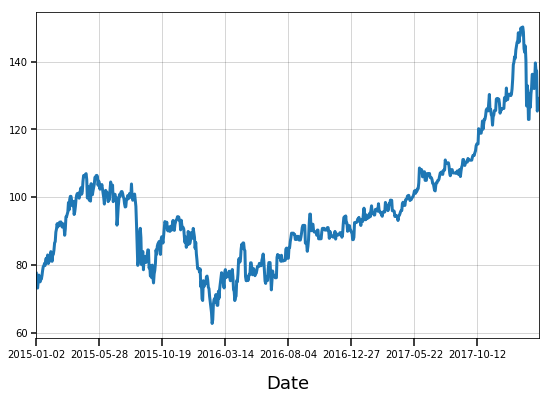

In [51]:
df_main.loc['EZJ']['Adj Close'][:].plot()